In [1]:
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
from pyemma.coordinates.data.featurization.misc import GroupCOMFeature


In [2]:
import featurize.featurize_v2 as feat_
import featurize.caller_v2 as caller

loading trajs through pyemma

In [3]:
from pyemma.coordinates import source
# files = ['traj_dat/w1.xtc', 'traj_dat/w2.xtc','traj_dat/w3.xtc'] 
files = ['../trajdat/dat2/rep1_tot.xtc','../trajdat/dat2/rep2_tot.xtc','../trajdat/dat2/rep3_tot.xtc',\
   '../trajdat/dat2/rep4.xtc','../trajdat/dat2/rep6_tot2.xtc','../trajdat/dat/1_tot.xtc','../trajdat/dat/3_tot.xtc',\
    '../trajdat/dat/5_tot.xtc','../trajdat/dat/9_tot.xtc']
top_file = 'traj_dat/10.gro'

In [4]:
feat = pyemma.coordinates.featurizer('traj_dat/10.gro') 
feat.add_distances_ca() 

In [7]:

reader = pyemma.coordinates.source(files, features=feat) 
ca_dists = reader.get_output()

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                    | 0/9 [00:00<?, ?it/s]

In [9]:
feat2 = pyemma.coordinates.featurizer('traj_dat/10.gro') 
feat2.add_backbone_torsions() 

In [10]:
reader2 = pyemma.coordinates.source(files, features=feat2) 
torsions = reader2.get_output()

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                    | 0/9 [00:00<?, ?it/s]

In [23]:
np.shape(ca_dists[0])

(10001, 595)

In [5]:
traj = md.load('traj_dat/w1.xtc', top=top_file)

In [18]:
md_list = []
mda_list = []
for item in files:
#     md_list.append(md.load(item, top='traj_dat/10.gro'))
    u_ = mda.Universe('traj_dat/10.gro', item)
    mda_list.append(u_)
    print(item)

../trajdat/dat2/rep1_tot.xtc
../trajdat/dat2/rep2_tot.xtc
../trajdat/dat2/rep3_tot.xtc
../trajdat/dat2/rep4.xtc
../trajdat/dat2/rep6_tot2.xtc
../trajdat/dat/1_tot.xtc
../trajdat/dat/3_tot.xtc
../trajdat/dat/5_tot.xtc
../trajdat/dat/9_tot.xtc


In [8]:
md_list

[<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells at 0x1543156e3fa0>,
 <mdtraj.Trajectory with 9089 frames, 234791 atoms, 43083 residues, and unitcells at 0x15431cc78f70>,
 <mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells at 0x15430b84dfa0>,
 <mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells at 0x153c767f21c0>,
 <mdtraj.Trajectory with 15271 frames, 234791 atoms, 43083 residues, and unitcells at 0x153c6e9aa760>,
 <mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells at 0x153c68d09c10>,
 <mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells at 0x153c63125e80>]

In [35]:
files

['../trajdat/dat2/rep1_tot.xtc',
 '../trajdat/dat2/rep2_tot.xtc',
 '../trajdat/dat2/rep3_tot.xtc',
 '../trajdat/dat2/rep4.xtc',
 '../trajdat/dat2/rep6_tot2.xtc',
 '../trajdat/dat/1_tot.xtc',
 '../trajdat/dat/3_tot.xtc',
 '../trajdat/dat/5_tot.xtc',
 '../trajdat/dat/9_tot.xtc']

In [15]:
j=len(md_list)

In [16]:
n_frames = []
for item in md_list:
    n_frames.append(len(item))

In [11]:
## testing the new function with is the distances to monolayer, with corrections to the PBC up/down

In [8]:
dist_analysis = feat_.dist()

In [9]:
dist_analysis.compute_penetration_depth

<bound method dist.compute_penetration_depth of <featurize.featurize_v2.dist object at 0x148da8045a90>>

In [31]:
contact_analysis = feat_.cont()

In [33]:
contact_analysis.contacts_MDA

<bound method cont.contacts_MDA of <featurize.featurize_v2.cont object at 0x153ff2a919a0>>

In [35]:
contact_analysis.run_coord

<bound method cont.run_coord of <featurize.featurize_v2.cont object at 0x153ff2a919a0>>

I want to save the trajectories I have so far


In [37]:
caller.save_reader(torsions, 'features_v1/torsions_v1')

In [38]:
caller.save_reader(ca_dists, 'features_v1/ca_v1')

Now I would like to run the analysis for featurizing coordination

In [6]:
protein_ca_indices = traj.topology.select('type C and protein')
lipid_p_indices = traj.topology.select('name P and resname POPC')

In [10]:
results_dist = []
for traj_file in files:
    for chunk in md.iterload(traj_file, top='traj_dat/10.gro',chunk = 20000):
        print(chunk, 'loading')
        penetration_depth = dist_analysis.compute_penetration_depth(chunk, protein_ca_indices, lipid_p_indices)
        print('done')
        results_dist.append(penetration_depth)


<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 9089 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 15271 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 10947 frames, 234791 atoms, 43083 residues, and unitcells> loading
done
<mdtraj.Trajectory with 13062 frames, 234791 atoms, 43083 residues, and unitcells> loading
done


In [ ]:
np.shape(results_dist[0])

In [19]:
# universes = [mda.Universe('traj_dat/10.gro', traj_mda) for traj_mda in files]

# Define lipid and protein selections
lipid_selection = '(resname POPC DOPE SAPI)'
prot_selections = [f"(resid {i}) and (not backbone)" for i in range(1, 36)]

# Initialize contact analysis class
contact_analysis = feat_.cont()

# Run analysis for each trajectory and each protein selection
mda_conts = []
for universe in mda_list:
    for prot_sel in prot_selections:
        result = contact_analysis.contacts_MDA(universe, universe.select_atoms(prot_sel), universe.select_atoms(lipid_selection))
        mda_conts.append(result)

In [47]:
np.shape(mda_conts)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(315,)

In [112]:
def calulate_dists(top_file, bil,a,b,c,d,e,f,g,h,i,j,k,l,m,n):
    bil = GroupCOMFeature(top_file.topology,bil)
    a = GroupCOMFeature(top_file.topology, a)
    b = GroupCOMFeature(top_file.topology, b)
    c = GroupCOMFeature(top_file.topology, c)
    d = GroupCOMFeature(top_file.topology, d)
    e = GroupCOMFeature(top_file.topology, e)
    f = GroupCOMFeature(top_file.topology, f)
    g = GroupCOMFeature(top_file.topology, g)
    h = GroupCOMFeature(top_file.topology, h)
    i = GroupCOMFeature(top_file.topology, i)
    j = GroupCOMFeature(top_file.topology, j)
    k = GroupCOMFeature(top_file.topology, k)
    l = GroupCOMFeature(top_file.topology, l)
    m = GroupCOMFeature(top_file.topology, m)
    n = GroupCOMFeature(top_file.topology, n)
    group_features_dict = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g, 'h': h, 'i': i, 'j': j, 'k': k, 'l': l, 'm': m, 'n': n}
    d_bil = feat_.dist()
    result2 = []
#     for traj in md_list:
    for traj_file in files:
        for chunk in md.iterload(traj_file, top='traj_dat/10.gro',chunk=20000):
            print(chunk, 'loading')
            for name, feature in group_features_dict.items():
                result2.append(d_bil.dist_bil(chunk,bil, feature))
    return result2

In [113]:
a =[list(range(1,367))]
bil =  [list(range(628,33617))]
b =  [list(range(1,2))]
c = [list(range(626,627))]
d = [list(range(128,129))]
e = [list(range(228,229))]
f = [list(range(328,339))]
g =  [list(range(428,429))]
h = [list(range(528,529))]
i = [list(range(600,601))]
j =  [list(range(28,29))]
k =  [list(range(439,440))]
l =  [list(range(462,463))]
m =  [list(range(498,499))]
n =  [list(range(534,535))]

In [114]:
ca_com_dists = calulate_dists(feat,bil,a , b ,c,d,e,f,g,h,i,j,k,l,m,n)

<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 9089 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 15271 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 10001 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 10947 frames, 234791 atoms, 43083 residues, and unitcells> loading
<mdtraj.Trajectory with 13062 frames, 234791 atoms, 43083 residues, and unitcells> loading


In [116]:
np.shape(ca_com_dists)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(126,)

In [43]:
length = int(len(files))

In [52]:
def make(data_inp):
    splits = np.array_split(data_inp, len(files))
    processor_ = caller.ChunkProcessor(splits, int(len(data_inp)/length) )
    m1 = processor_.fubar(splits, int(len(data_inp)/(len(files))))
    return(m1)

In [53]:
def combine(data_inp):
    # Create a list of ReturnInputs instances, one for each trajectory
    processors = [caller.ReturnInputs() for _ in range(len(files))]

    # Reshape the processed results using the ReturnInputs instances
    inputs = [processor.return_inputs(make(data_inp), i, int(len(data_inp)/length)) for i, processor in enumerate(processors)]
    inputs = [x[0] for x in inputs]
    return(inputs)


In [54]:
# Combine the data from each dataset for each trajectory
result_list = []
for i in range(len(files)):
#     arr1 = data_output[i]
    arr2 = combine(mda_conts)[i]
#     arr3 = results_dist[i]
#     result = np.concatenate(( arr2), axis=1)
    result_list.append(result)

(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)


AxisError: axis 1 is out of bounds for array of dimension 1

Below, we are only saving one input feature

In [55]:
# Combine the data from each dataset for each trajectory
result_list = []
for i in range(len(files)):
    arr2 = combine(mda_conts)[i]
    result_list.append(arr2)

(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)

In [63]:
np.shape(result_list[2])

(10001, 35)

In [64]:
caller.save_reader(result_list, 'features_v1/contacts_v1')

In [66]:
coord_analysis = feat_.cont()
coord_analysis.run_coord

<bound method cont.run_coord of <featurize.featurize_v2.cont object at 0x153ff6ad8a30>>

In [67]:
# Define lipid and protein selections
lipid_selection = '(resname POPC DOPE SAPI and name P)'
prot_selections = [f"(resid {i}) and (not backbone)" for i in range(1, 36)]

# Run analysis for each trajectory and each protein selection
results_coord = []
for universe in mda_list:
    for prot_sel in prot_selections:
        result = coord_analysis.run_coord(universe, universe.select_atoms(prot_sel), universe.select_atoms(lipid_selection))
        results_coord.append(result)

Now we save the output from the coordination analysis

In [90]:
# Combine the data from each dataset for each trajectory
result_list2 = []
for i in range(len(files)):
    arr3 = combine(results_coord)[i]
    result_list2.append(arr3)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 15271)
(1, 1, 35, 10001)
(1, 1, 35, 10001)
(1, 1, 35, 10947)
(1, 1, 35, 13062)
(1, 1, 35, 10001)
(1, 1, 35, 9089)

In [105]:
caller.save_reader(result_list, 'features_v1/coord_v1')

In [117]:
# Combine the data from each dataset for each trajectory
result_ca_com = []
for i in range(len(files)):
    arr4 = combine(ca_com_dists)[i]
    result_ca_com.append(arr4)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 15271)
(1, 1, 14, 10001)
(1, 1, 14, 10001)
(1, 1, 14, 10947)
(1, 1, 14, 13062)
(1, 1, 14, 10001)
(1, 1, 14, 9089)

In [118]:
caller.save_reader(result_ca_com, 'features_v1/ca_com_v1')

In [71]:
# splits breaks it into the correct amount of trajectories
splits1 = np.array_split(results, 3)

# here we are pushing to have the whole thing reshaped
processor1 = caller.ChunkProcessor(splits1, 35)

m1 = processor1.fubar(splits1, 35)

/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [31]:
# splits breaks it into the correct amount of trajectories
splits2 = np.array_split(result2, 3)

# here we are pushing to have the whole thing reshaped
processor2 = caller.ChunkProcessor(splits2, 14)

m2 = processor2.fubar(splits2, 14)

In [32]:
np.shape(splits1)

(3, 35)

In [33]:
processors = [caller.ReturnInputs() for _ in range(3)]
inputs = [processor.return_inputs(m1, i, 35) for i, processor in enumerate(processors)]

(1, 1, 35, 11)
(1, 1, 35, 5)
(1, 1, 35, 11)


In [34]:
def return_inputs(m, i, n):
    return caller.ReturnInputs().return_inputs(m, i, n)




In [72]:
processors = [caller.ReturnInputs() for i in range(3)]
inputs = [processor.return_inputs(m1, i, 35) for i, processor in enumerate(processors)]
inputs = [x[0] for x in inputs]

(1, 1, 35, 1001)
(1, 1, 35, 500)
(1, 1, 35, 1001)


In [73]:
processors2 = [caller.ReturnInputs() for i in range(3)]
inputs2 = [processor.return_inputs(m2, i, 14) for i, processor in enumerate(processors2)]
inputs2 = [x[0] for x in inputs2]

(1, 1, 14, 11)
(1, 1, 14, 5)
(1, 1, 14, 11)


In [37]:
np.shape(inputs[0])

(11, 35)

In [46]:
## testing below adding all the features and whatnot

In [75]:
result_list = []
for i in range(3):
    arr1 = data_output[i]
    print(np.shape(arr1))
    arr2 = inputs[i]
    print(np.shape(arr2))
#     arr3 = inputs2[i]
#     print(np.shape(arr3))
    arr4 = results_dist[i]
    print(np.shape(arr4))
    result = np.concatenate((arr1, arr2,  arr4), axis=1)
    result_list.append(result)

(1001, 72)
(1001, 35)
(1001, 203)
(500, 72)
(500, 35)
(500, 203)
(1001, 72)
(1001, 35)
(1001, 203)


In [43]:
np.shape(result_list[1])

(5, 324)

In [90]:
def get_inputs(m, splits, feat_len):
    processors = [caller.ReturnInputs() for i in range(len(splits))]
    inputs = [processor.return_inputs(m, i, feat_len)[0] for i, processor in enumerate(processors)]
    return inputs

def get_fubar_output(splits, feat_len):
    processor = caller.ChunkProcessor(splits, feat_len)
    return processor.fubar(splits, feat_len)


def combine_results(data_output, splits1,  results_dist, feat_len1):

    def return_inputs(m, i, n):
        return caller.ReturnInputs().return_inputs(m, i, n)
    
#     inputs1 = get_inputs(m1, splits1, feat_len1)
#     inputs2 = get_inputs(m2, splits2, feat_len2)

    result_list = []
    for i in range(len(splits1)):
        arr1 = data_output[i]
        print(np.shape(arr1),'1')
        arr2 = inputs1[i]
        print(np.shape(arr2),'2')
#         arr3 = inputs2[i]
#         print(np.shape(arr3),'3')
        arr4 = results_dist[i]
        print(np.shape(arr4),'4')
        result = np.concatenate((arr1, arr2,  arr4), axis=1)
        print(np.shape(result))
        result_list.append(result)

    return result_list


In [91]:
m1 = get_fubar_output(splits1, feat_len1)
# m2 = get_fubar_output(splits2, feat_len2)
inputs1 = get_inputs(m1, splits1, feat_len1)
# inputs2 = get_inputs(m2, splits2, feat_len2)


splits1 = np.array_split(results, 3)
splits2 = np.array_split(result2, 3)
# data_output = [...]  # the original `data_output` array

feat_len1 = 35  
feat_len2 = 14

result_list = combine_results(data_output, splits1, results_dist, feat_len1)

(1, 1, 35, 1001)
(1, 1, 35, 500)
(1, 1, 35, 1001)
(1001, 72) 1
(1001, 35) 2
(1001, 203) 4
(1001, 310)
(500, 72) 1
(500, 35) 2
(500, 203) 4
(500, 310)
(1001, 72) 1
(1001, 35) 2
(1001, 203) 4
(1001, 310)


/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [81]:
np.shape(result_list)

(3,)

In [18]:
np.shape(results_list[0])

NameError: name 'results_list' is not defined

In [65]:
import featurize.caller as caller

In [66]:
caller.save_reader(result_list, 'dist_cont')

In [67]:
result_list

[array([[ 1.90000000e+01,  0.00000000e+00,  0.00000000e+00, ...,
          1.61788750e+00,  1.32288742e+00,  1.24088669e+00],
        [ 4.10000000e+01,  0.00000000e+00,  0.00000000e+00, ...,
          1.47852325e+00,  1.22652245e+00,  8.79522324e-01],
        [ 2.40000000e+01,  6.00000000e+00,  0.00000000e+00, ...,
          1.48470497e+00,  1.15670395e+00,  9.35703278e-01],
        ...,
        [ 5.20000000e+01,  1.80000000e+01,  0.00000000e+00, ...,
          3.27728271e-01, -1.32732391e-02,  1.49726868e-01],
        [ 7.00000000e+01,  3.70000000e+01,  1.00000000e+00, ...,
          3.68988037e-01,  6.59885406e-02,  2.92989731e-01],
        [ 5.70000000e+01,  2.10000000e+01,  1.40000000e+01, ...,
          3.60113144e-01,  6.81133270e-02,  3.10113907e-01]]),
 array([[29.        ,  4.        ,  0.        , ...,  1.53277397,
          1.28777313,  1.15377426],
        [25.        ,  0.        ,  0.        , ...,  1.52163696,
          1.34063721,  1.10463715],
        [ 4.        ,  1.

In [25]:
np.shape(results_dist)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(990,)

In [180]:
result_list[1]

array([[-1.04909968e+00,  1.50434387e+00, -1.53359246e+00,
        -5.91566503e-01, -1.07766628e+00,  1.93545237e-01,
        -1.21427405e+00, -8.58745754e-01, -9.22943771e-01,
        -7.27400661e-01, -1.18401122e+00, -9.67948616e-01,
        -9.46216106e-01, -7.61954963e-01, -1.01568508e+00,
        -9.12020683e-01, -1.20082736e+00, -6.57514691e-01,
        -1.16848207e+00, -6.44911289e-01, -1.24148142e+00,
        -6.32262349e-01, -1.01389027e+00, -6.72614992e-01,
        -1.08124256e+00, -7.38755882e-01, -1.10988927e+00,
        -8.92843246e-01,  1.30251992e+00, -6.41340375e-01,
        -2.54216528e+00,  6.56877995e-01, -1.32050705e+00,
         1.89611197e+00, -1.31834328e+00, -2.38088772e-01,
        -1.52294683e+00, -3.37930053e-01, -1.00746262e+00,
         3.10153633e-01, -8.74078691e-01, -8.51775050e-01,
        -1.15968919e+00, -7.75198698e-01, -1.07453632e+00,
        -8.57590675e-01, -1.10178804e+00, -7.34306455e-01,
        -1.18329978e+00, -7.78503478e-01, -1.18402052e+0

In [72]:
tica_dev = pyemma.coordinates.tica(result_list,lag=5, dim=4)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/9 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/9 [00:00<?, ?it/s]

In [73]:
np.shape(tica_concatenated)

(98374, 4)

In [74]:
ls = caller.make_arr(tica_concatenated)

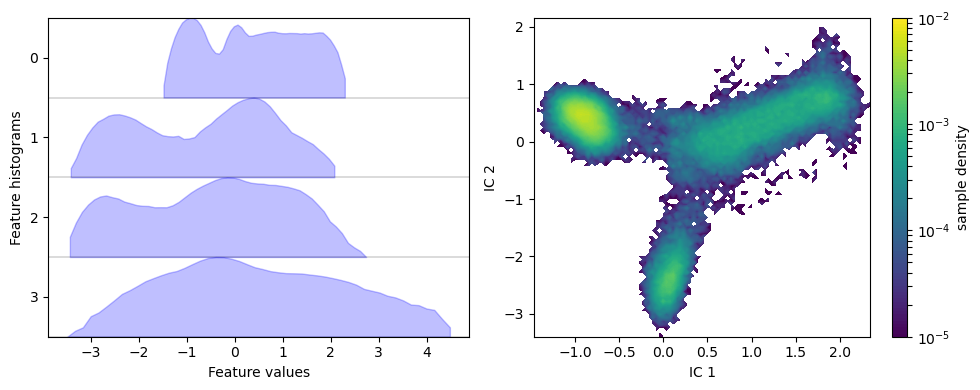

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica2.png')

In [76]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=200, max_iter=100, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                      | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|                                | 0/100 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/9 [00:00<?, ?it/s]

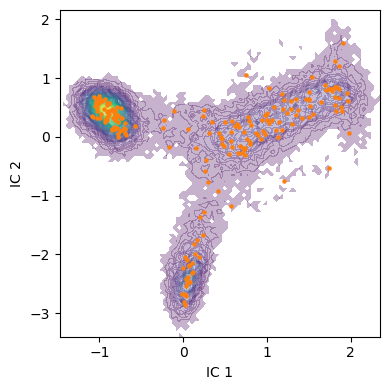

In [77]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

In [78]:
its = pyemma.msm.its(cluster.dtrajs, lags=100, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

estimating BayesianMSM:   0%|                            | 0/12 [00:00<?, ?it/s]

Process ForkPoolWorker-6:
Process ForkPoolWorker-11:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-37:
Process ForkPoolWorker-9:
Process ForkPoolWorker-1:
Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Process ForkPoolWorker-40:
Process ForkPoolWorker-5:
Process ForkPoolWorker-17:
Process ForkPoolWorker-23:
Process ForkPoolWorker-10:
Process ForkPoolWorker-7:
Process ForkPoolWorker-10:
Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-13:
Process ForkPoolWorker-7:
Process ForkPoolWorker-26:
Process ForkPoolWorker-1:
Process ForkPoolWorker-7:
Process ForkPoolWorker-36:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-3:
Process ForkPoolWorker-10:
Process ForkPoolWorker-10:
Process ForkPoolWorker-7:
Process ForkPoolWorker-10:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-9:
Process ForkPoolWorker-1

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-6:
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (mo

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
Traceback (most recent call 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process ForkPoolWorker-7:
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock

Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **se

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/queues.py", line 367, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/queues.py", line 367, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File 

KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/l

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/queues.py", line 367, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
Keybo

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/queues.py", line 367, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worke

KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.ut

KeyboardInterrupt
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
    KeyboardInterruptKeyboardInterrupt
Traceback (most recent call last):
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:

KeyboardInterrupt
KeyboardInterruptKeyboardInterrupt
Exception ignored in:   File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/

Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/process.py", line 108, i

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return se

  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterruptKeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardI

KeyboardInterrupt: 

In [113]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=1, dt_traj='0.2 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[36]: compute stat. inefficiencies:   0%|          | 0/69 [00:00…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[36]: Sampling MSMs:   0%|                        | 0/100 [00:00…

fraction of states used = 0.80
fraction of counts used = 0.77
